# Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [1]:
#help(hclust)

In [2]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

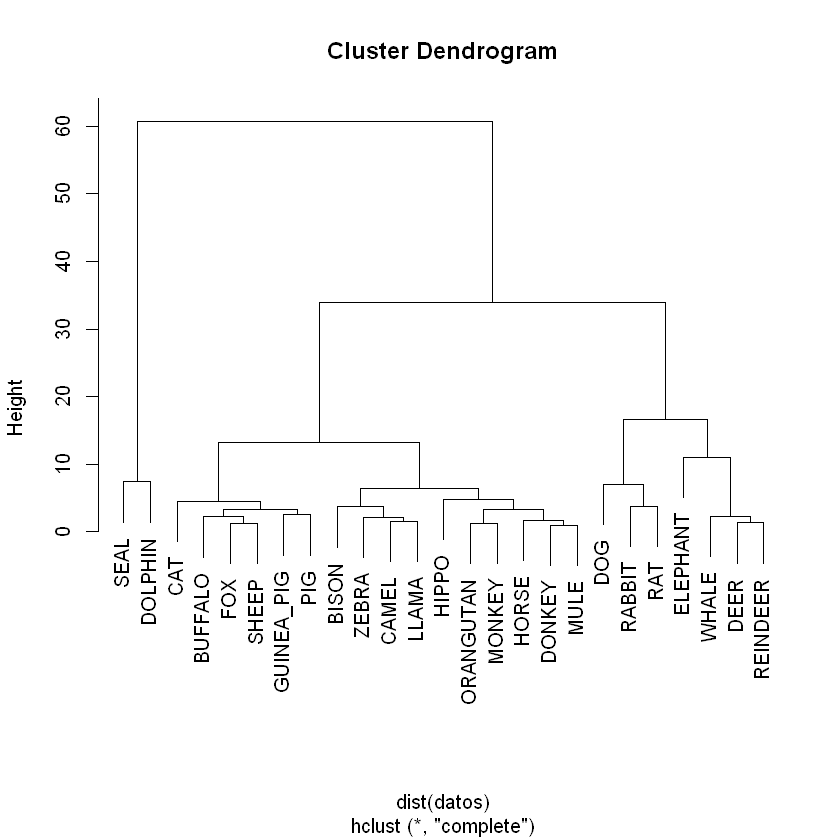

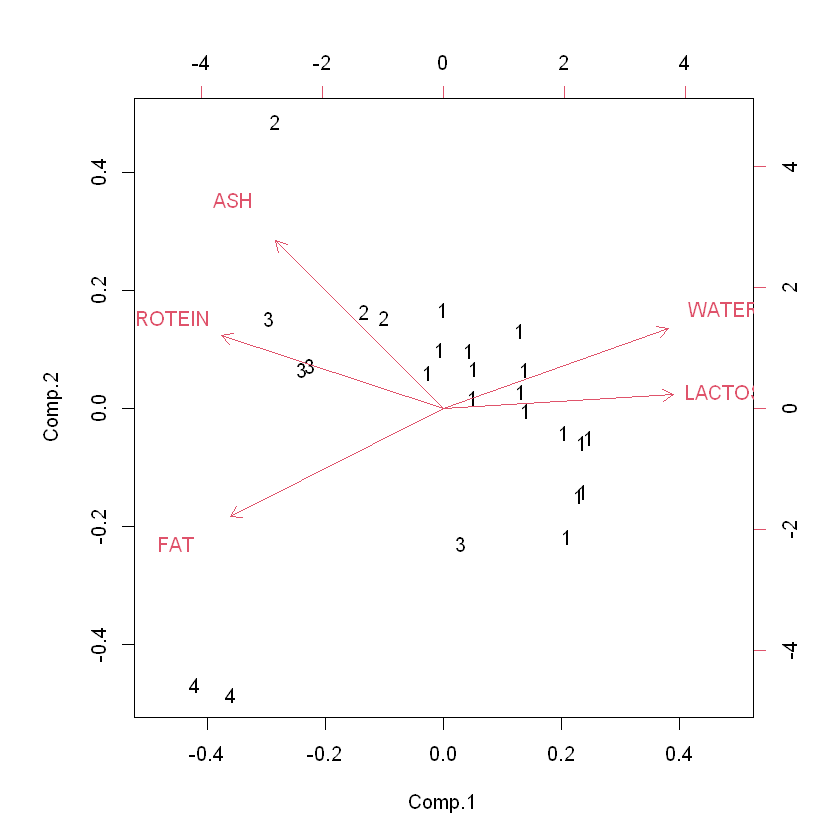

In [3]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


#### Repuesta 1.a
Este método realiza un análisis de conglomerados jerárquico utilizando un conjunto de disimilitudes, es una técnica de análisis de datos que agrupa objetos en una estructura de tipo árbol binario llamada dendrograma, la cual permite descubrir estructuras de similitud entre observaciones y representarlas jerárquicamente. Inicialmente, cada observación va a representar a un grupo y, a continuación, el algoritmo procede iterativamente, uniendo en cada etapa las observaciones, hasta que solo queda un grupo.

Los parametros de entrada principales son:
- d: objeto de clase dist que representa la matriz de disimilitudes entre observaciones
- method: método de enlace para formar los clústeres. (complete, single, average, ward.D, ward.D2, mcquitty, median, centroid)
- members: vector numérico con el tamaño de cada objeto si no todos representan una única observación, proporciona la identificación de grupos iniciales. De esta forma, el algoritmo de conglomerados jerárquico puede iniciarse en medio del dendrograma

La salida tiene lo siguiente:
- merge: Es una matriz de (n-1) por 2, indica qué grupos se fusionaron en cada paso.
- height: valor con la altura (distancia) en la que se hicieron las fusiones.
- order: vector que indica el orden en que deben disponerse las hojas del dendrograma para evitar cruces.
- labels: etiquetas de las observaciones.
- method: el método de agrupamiento que se ha utilizado.
- calls: la llamada que produjo el resultado.
- dist.method: método utilizado para calcular las distancias.

#### Repuesta 1.b
El primer dendograma muestra un agrupamiento jerárquico de animales basado en similitud nutricional (grasa, proteina, agua, etc). El dendograma muestra como los animales se agrupan progresivamente en grupos a distintas alturas. En donde los grupos cercanos, que están más abajo en el dendograma tiene composiciones nutricionales más similares. Por ejemplo, "seal" y "dolphin" estan muy alejados de otros animales, lo que puede decir que tienen perfiles nutricionales muy distintos al resto.

En el bitplot, muestra la proyección de los datos sobre los dos primeros componentes principales, en donde se utilizaron 4 grupos o clústeres como lo indica el método, y los numeros 1,2,3,4 indican a que grupo pertenece cada observación.

#### Respuesta 1.c

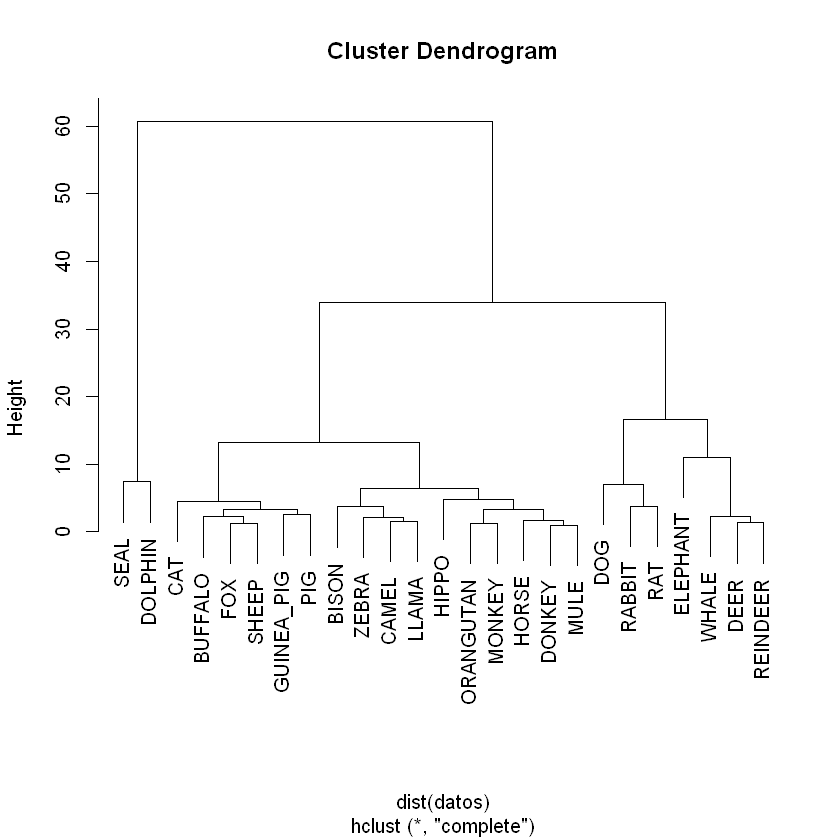

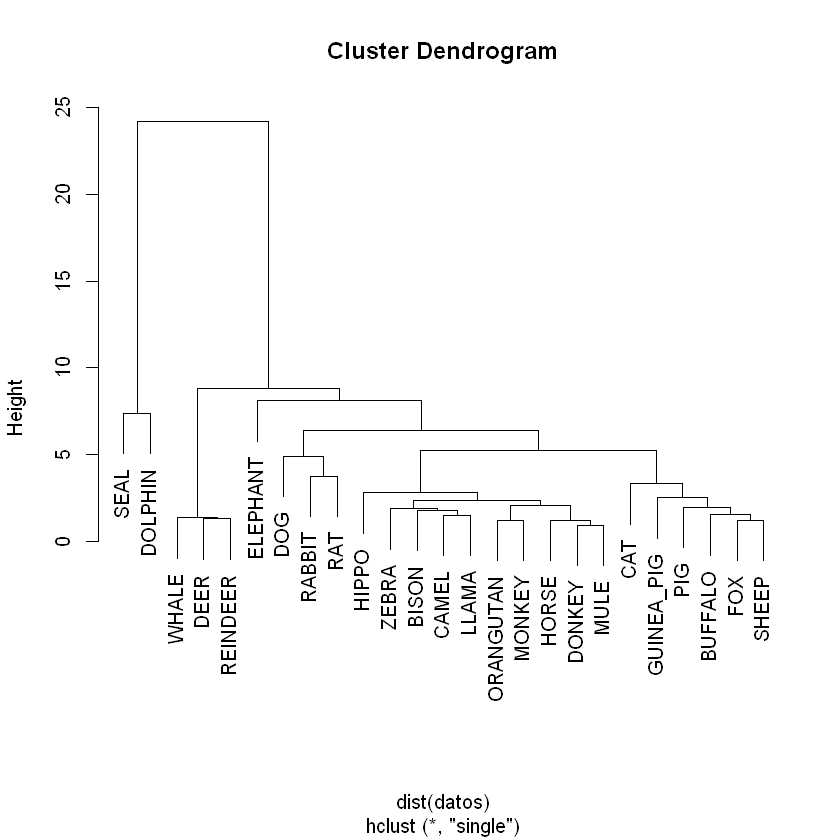

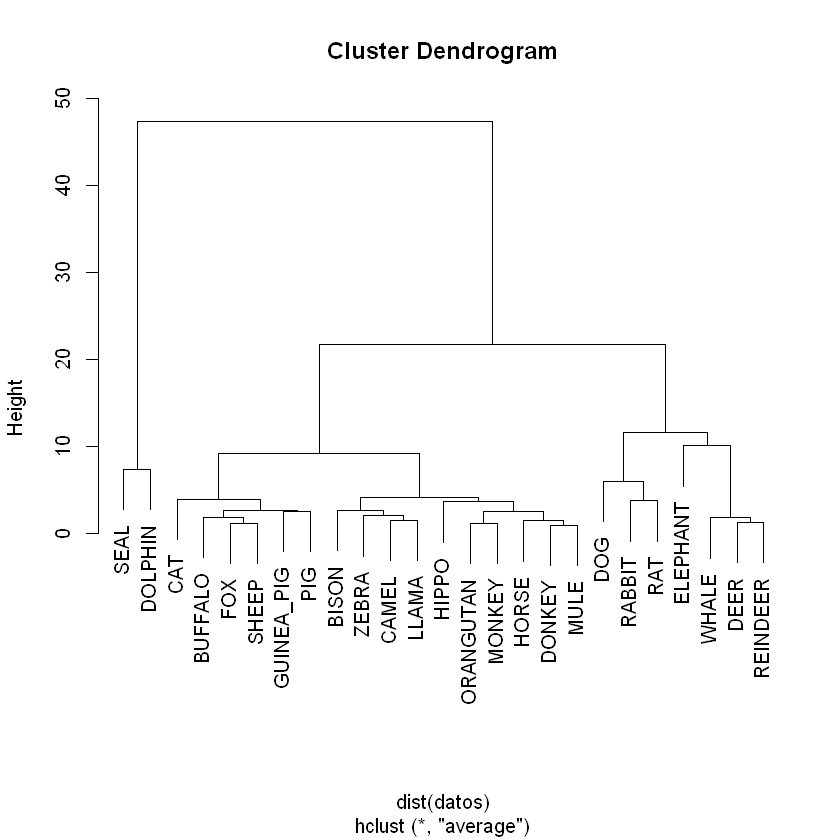

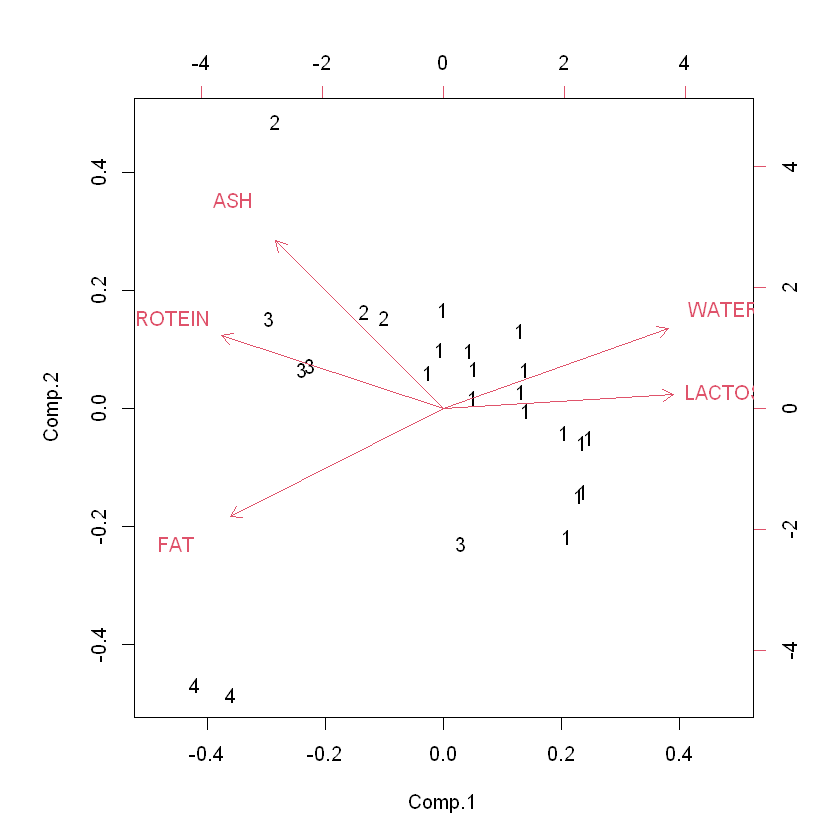

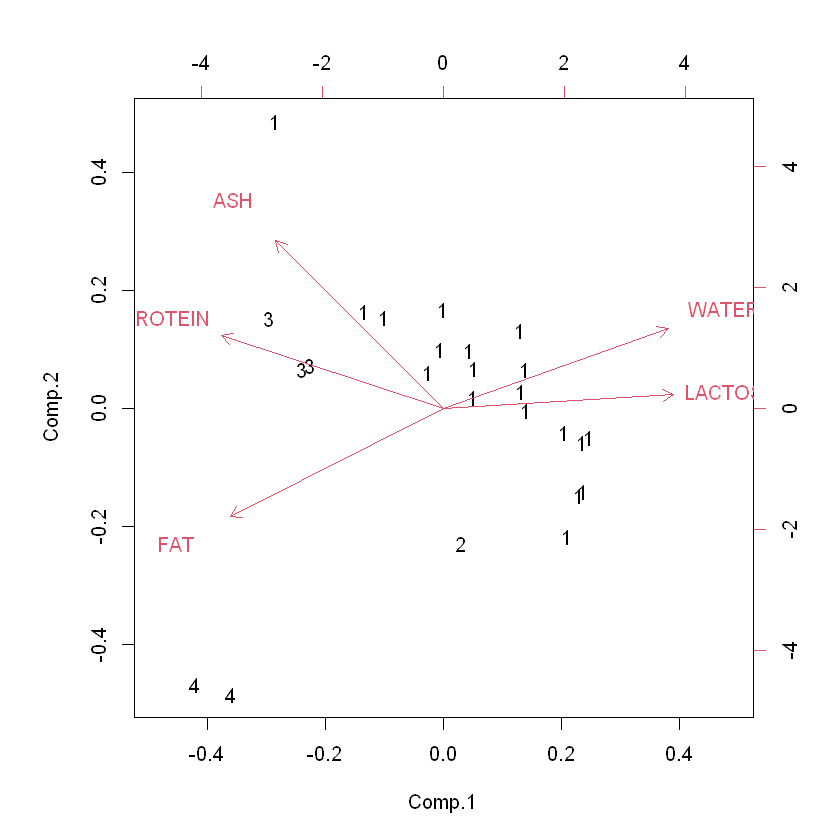

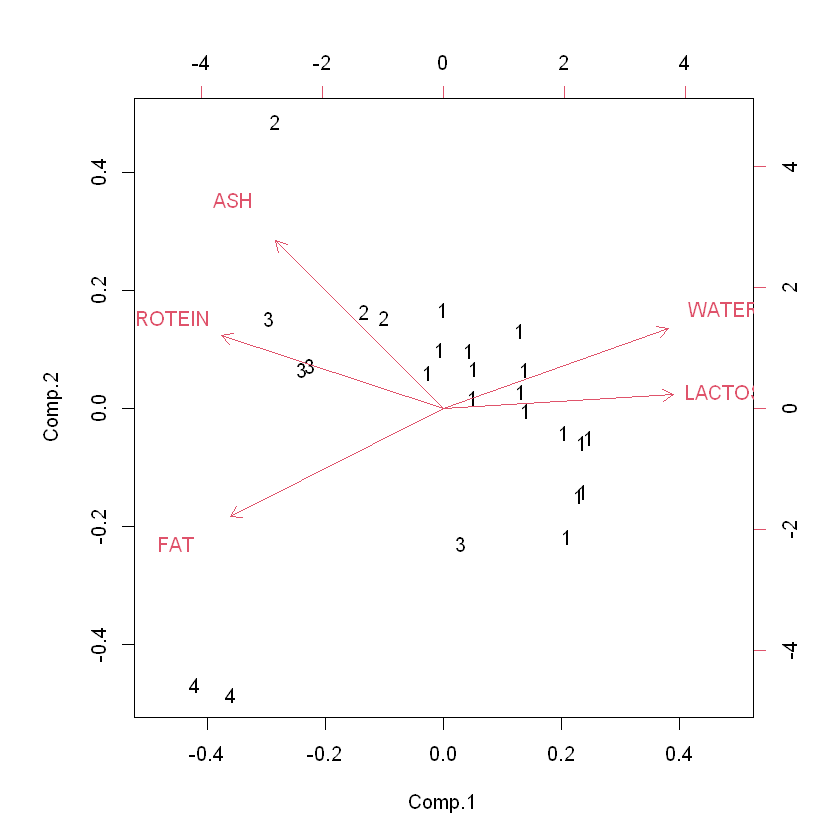

In [4]:
#Distintos parametros de metodos: Single y average
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
plot(res3)
plot(res4)
plot(res5)
biplot(res, xlabs= cutree(res3,4))
biplot(res, xlabs= cutree(res4,4))
biplot(res, xlabs= cutree(res5,4))

Para el conjunto de datos, se observan diferencias entre los distintos métodos, con el método single se ven que estan los grupos menos concentrados, a comparación con los métodos complete y average (el método complete viene por defecto en hclust, sino se le especifica), con estos dos últimos métodos, se observan grupos más concentrados.

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [5]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



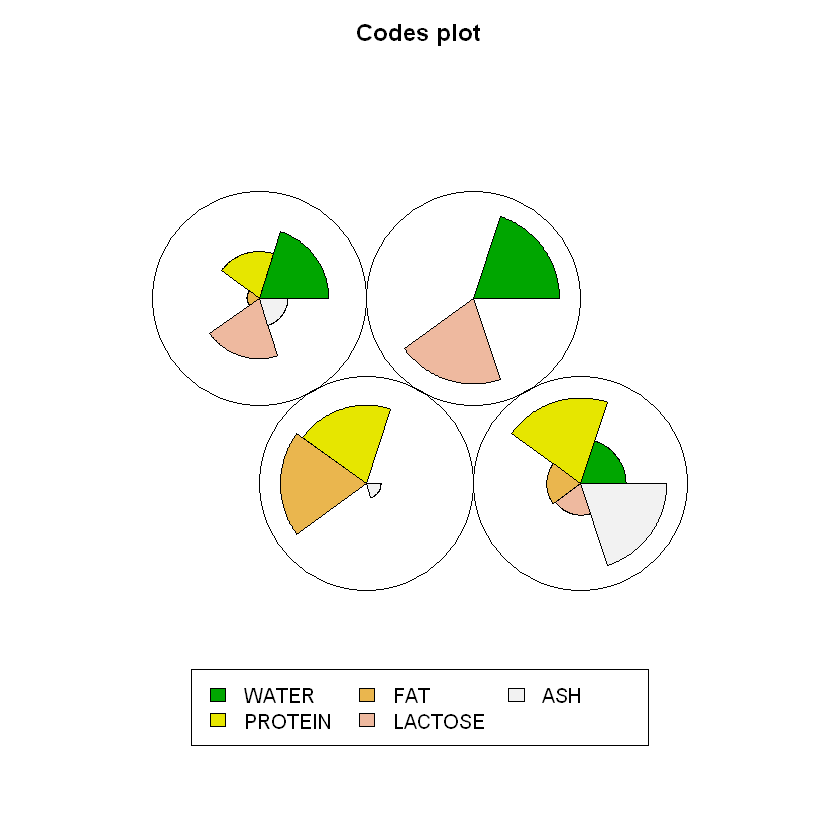

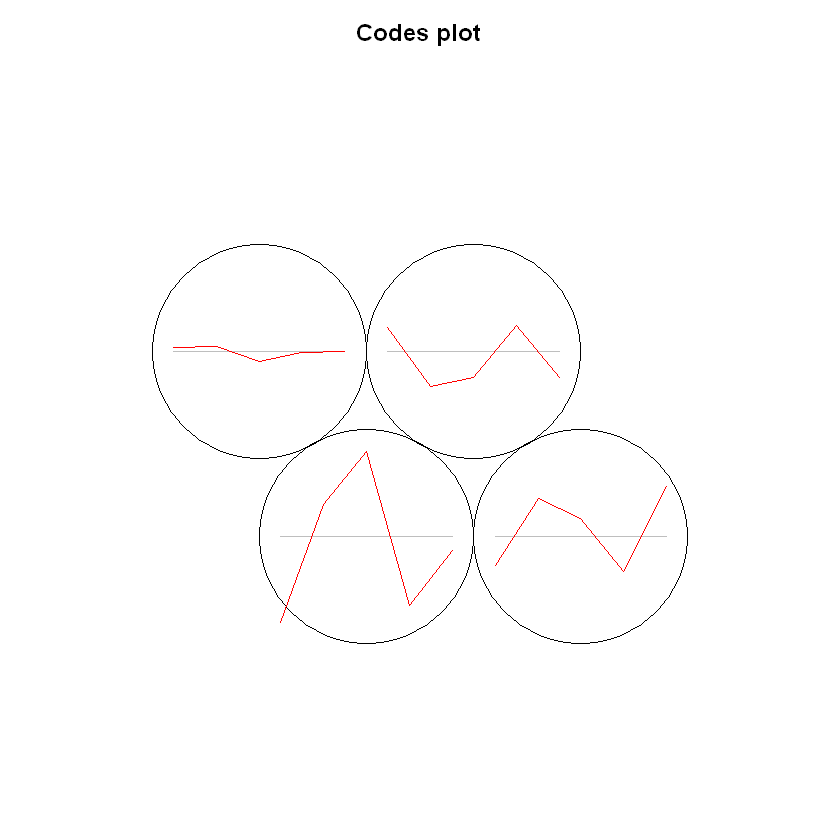

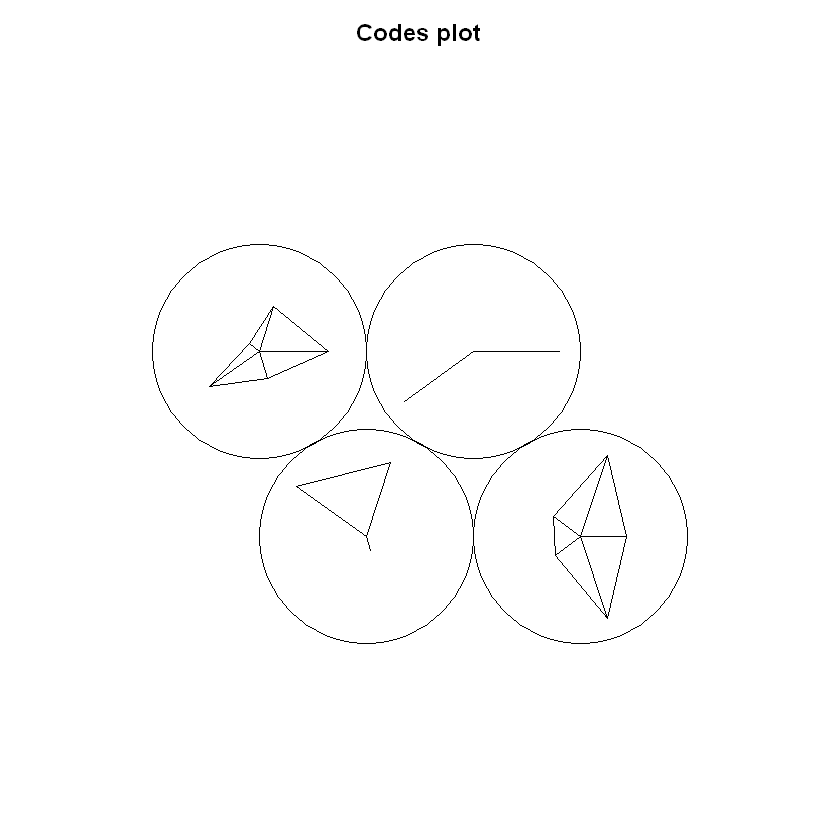

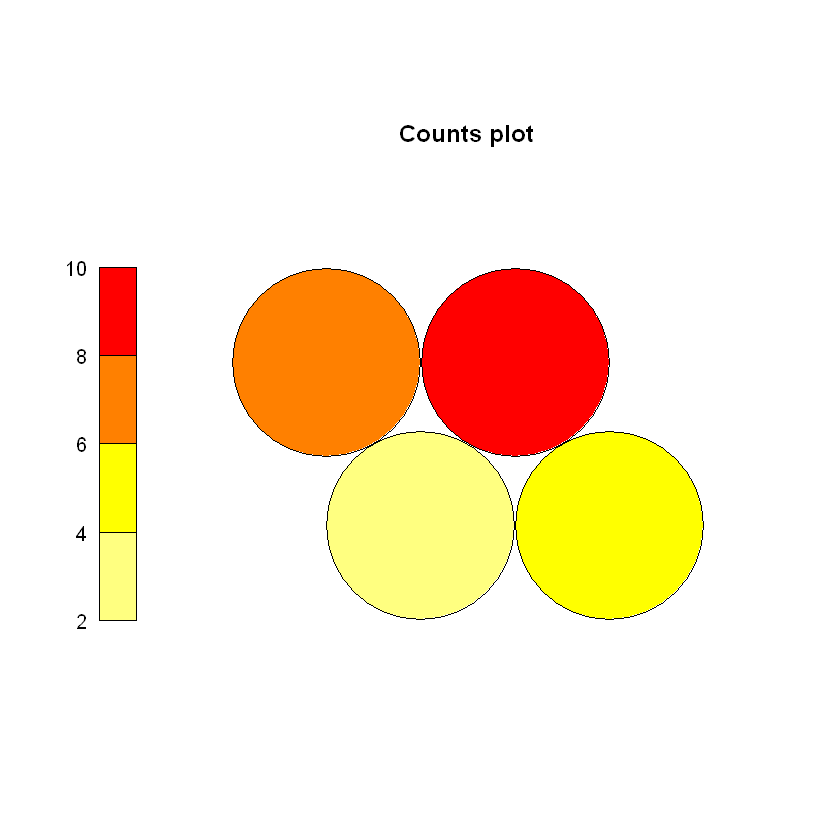

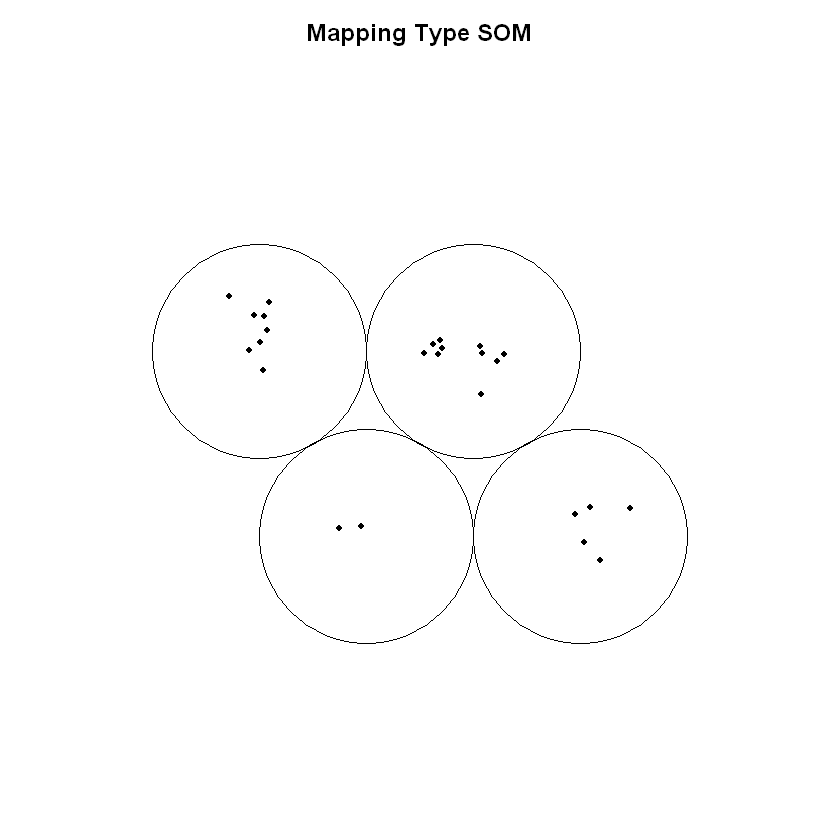

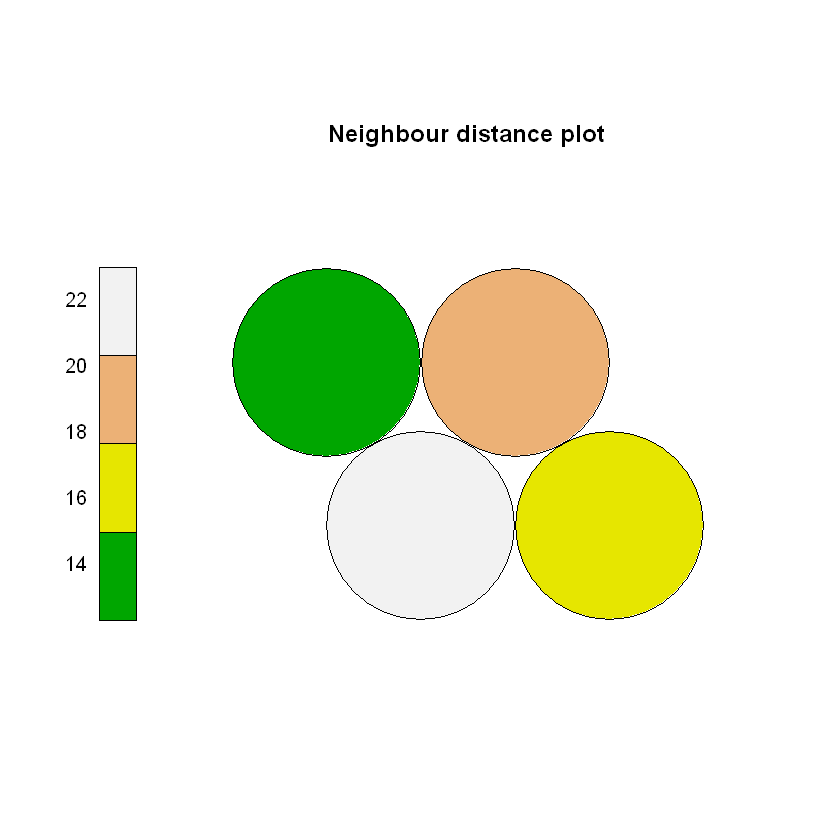

In [6]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)



**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

In [7]:
#help(som)
str(sommap) #Para ver la estructura de sommap, por lo tanto los paramétros de salida

List of 14
 $ data            :List of 1
  ..$ : num [1:25, 1:5] 0.93 0.805 0.797 0.945 0.953 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:25] "HORSE" "ORANGUTAN" "MONKEY" "DONKEY" ...
  .. .. ..$ : chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
  .. ..- attr(*, "scaled:center")= Named num [1:5] 78.184 6.212 10.308 4.132 0.863
  .. .. ..- attr(*, "names")= chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
  .. ..- attr(*, "scaled:scale")= Named num [1:5] 12.818 3.653 10.518 1.832 0.505
  .. .. ..- attr(*, "names")= chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
 $ unit.classif    : num [1:25] 4 4 4 4 4 4 4 3 3 3 ...
 $ distances       : num [1:25] 0.54 0.388 0.537 0.198 1.471 ...
 $ grid            :List of 6
  ..$ pts              : num [1:4, 1:2] 1.5 2.5 1 2 0.866 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "x" "y"
  ..$ xdim             : num 2
  ..$ ydim             : num 2
  ..$ topo             : chr "hexagonal"
  ..$ n

#### Respuesta 2.a
El método SOM es una técnica de reducción de dimensionalidad y agrupamiento no supervisado desarrollada por Teuvo Kohonen. SOM nos permite representar datos multidimensionales en espacios de menor dimensión. El método SOM utiliza el algoritmo de Autoorganización no supervisado para organizar los datos de entrada de forma que elementos similares queden cercanos en un mapa de menor dimensión, manteniendo la estructura topológica de los datos originales.

Los paramétros de entrada son:
- data: matriz o data frame con los datos numéricos (ya normalizados o escalados).
- grid: estructura del mapa.
- rlen: número de iteraciones de entrenamiento.
- alpha: tasa de aprendizaje.
- radius: vecindad inicial para el entrenamiento.

Las salidas son:
- unit.classif: es un vector que indica en que nodo fue clasificada cada observación del dataset.
- distances: es la distancia entre cada dato y el nodo al que fue asignado.
- grid: es la estructura del mapa SOM, el cómo están organizados los nodos.
- codes: son los pesos (vectores de características) de cada nodo.
- changes: un vector con la media de las distancias de ajuste de pesos por iteración durante el entrenamiento.

Los gráficos obtenidos:
1. Es una visualización de los codes, utilizando la representación de segment, lo que es bueno para ver la contribución individual de cada variante en cada nodo.
2. Es una visualización de los codes, utilizando la representación de lines, que es útil para comparar los perfiles generales entre los nodos.
3. Es una visualización de los codes, utilizando la representación de stars, que permite comparar los valores de todas las variables para cada nodo.
4. Muestra la cantidad de datos asignados a cada nodo.
5. Muestra en que nodo quedo mapeado cada dato.
6. Muestra la distancia entre vectores de peso de nodos vecinos.

#### Respuesta 2.b

Decidimos cambiar el tamaño del grid, a uno de 3x3 de forma rectangular, lo que llevo a generar un total de 9 nodos, haciendo que las observaciones se distribuyeran entre más nodos permitiendo una mayor discriminación entre observaciones y formando agrupamientos más rigidos. Además decidimos podemos ver que en sommap donde el grid es de 2x2, se logra una convergencia  con valores cercanos a las 100 iteraciones, en cambio cuando el grid es de 3x3 el número de iteraciones para ir convergiendo aumenta a poco menos de 600 iteraciones. Esto puede deberse a que al tener un mayor número de nodos se requiere un mayor ajuste de los pesos para representar correctamente la estructura de los datos.

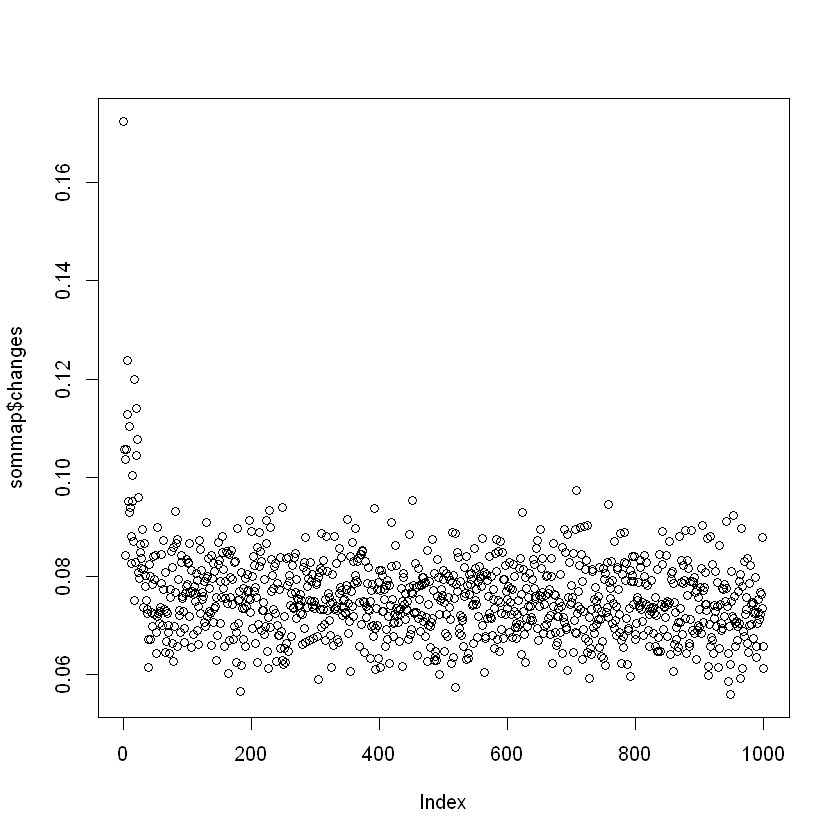

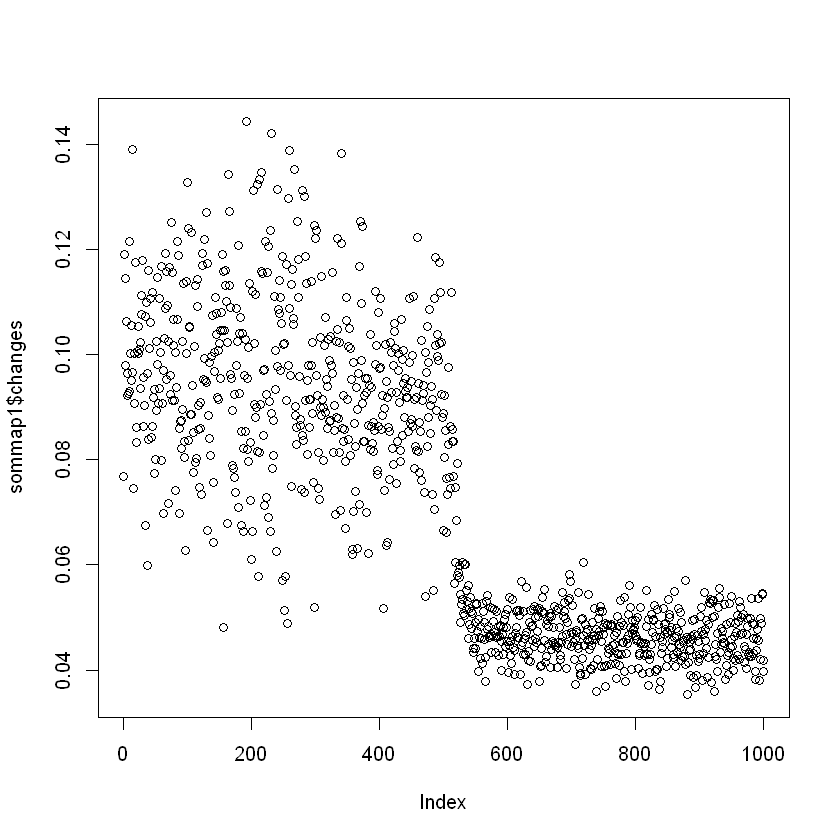

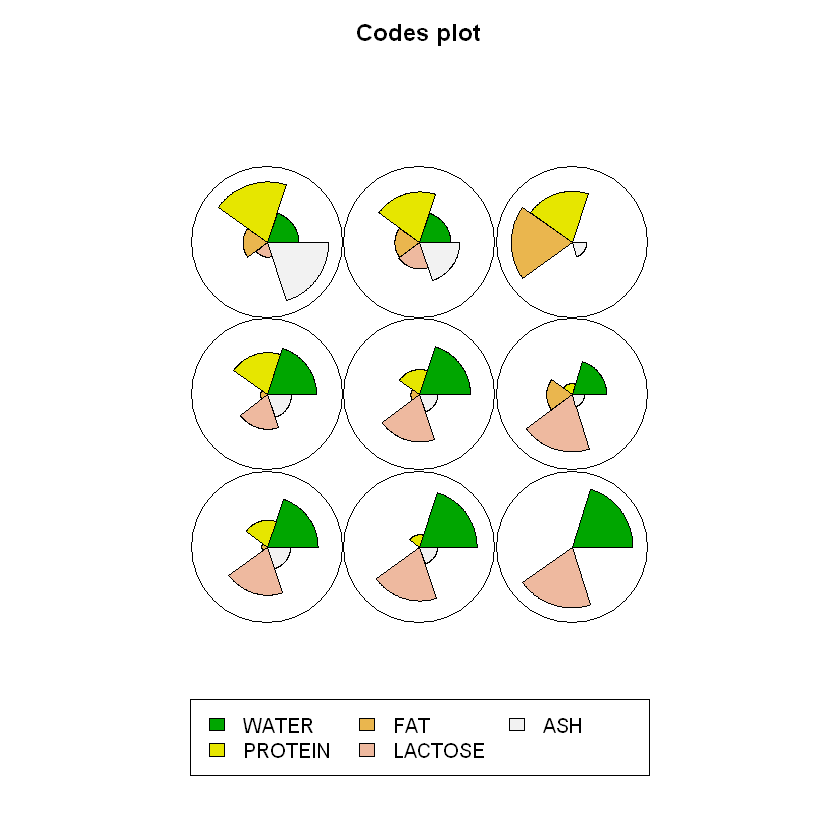

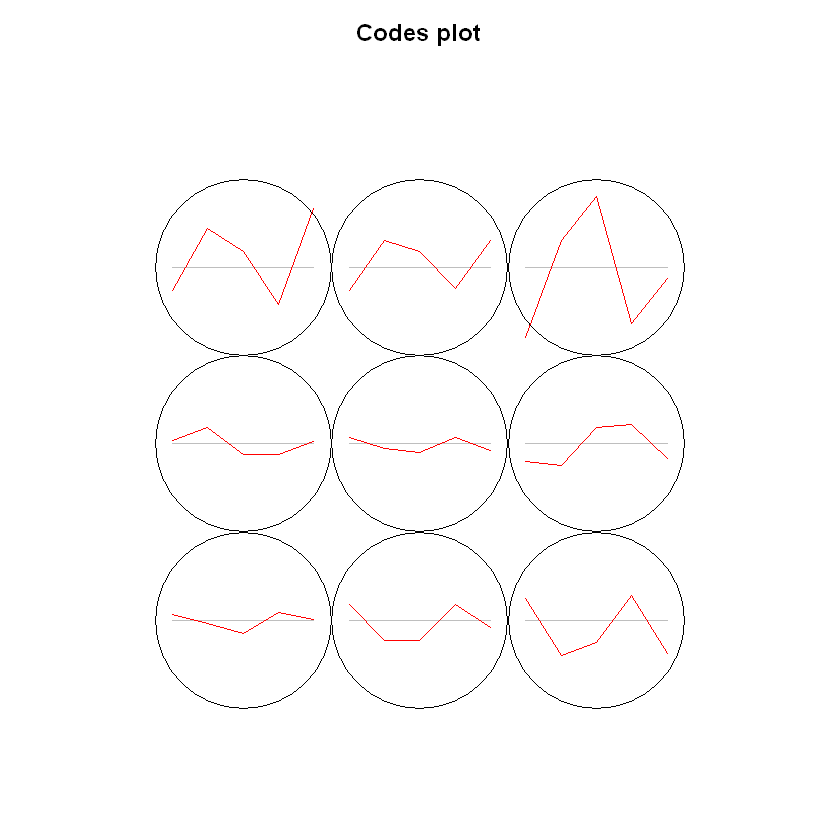

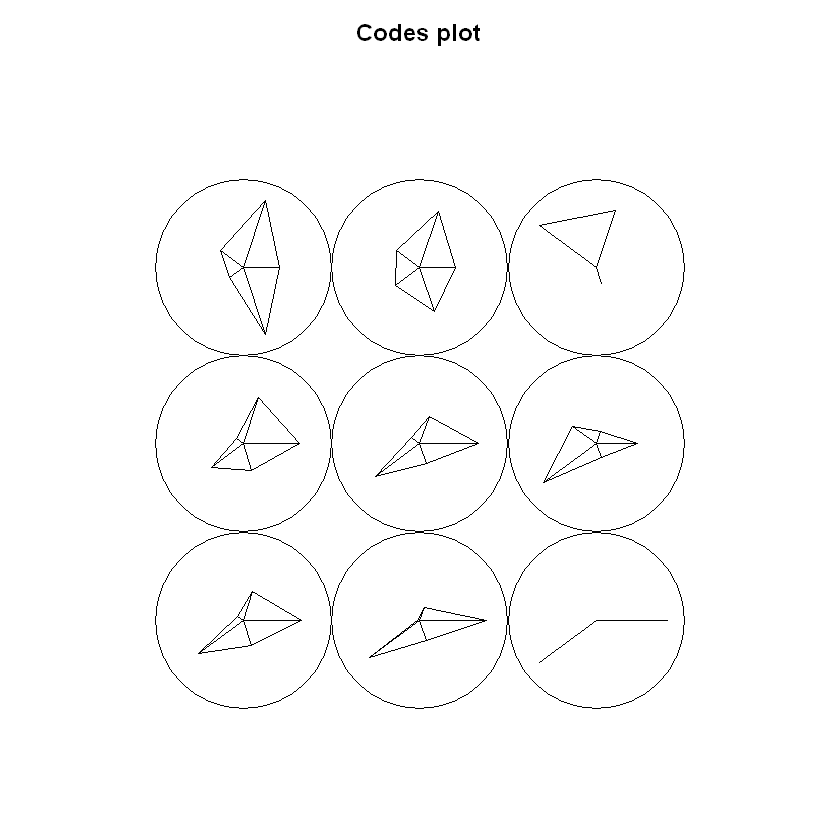

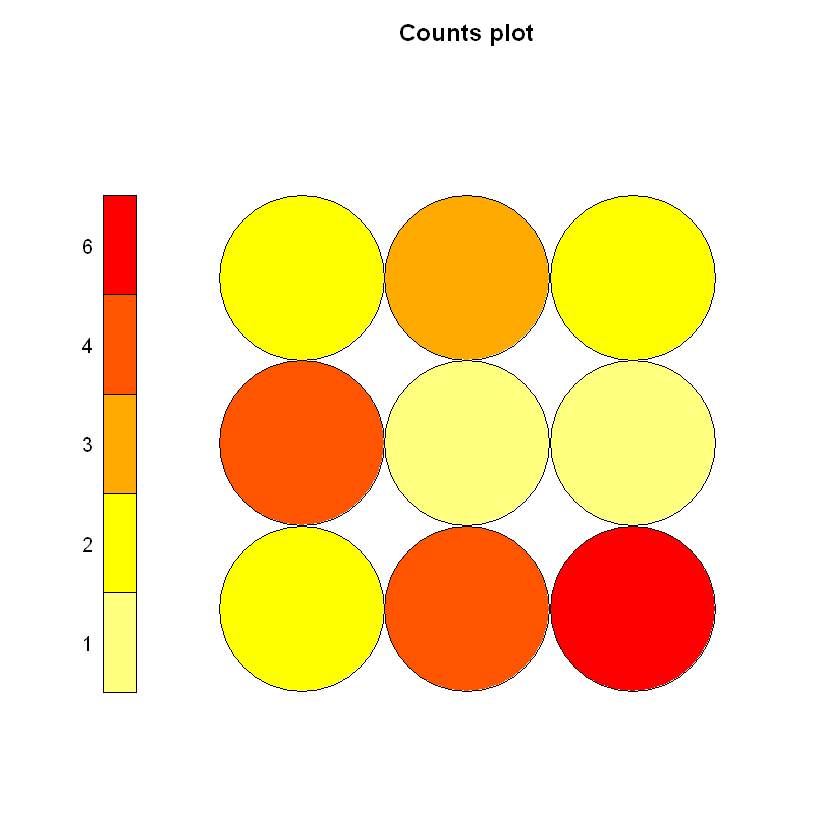

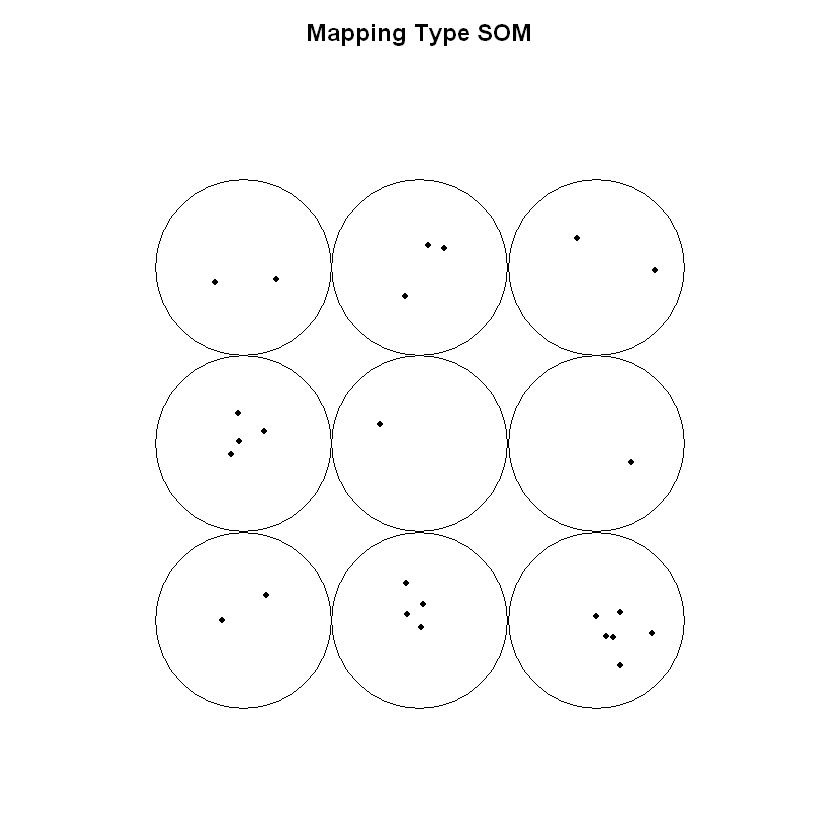

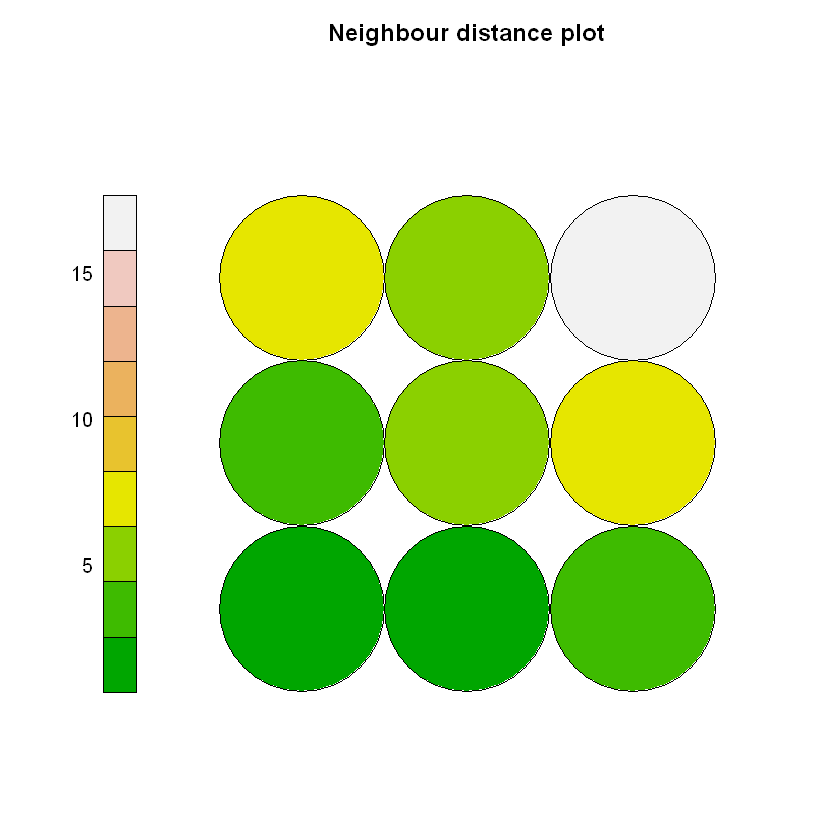

In [8]:
#create SOM grid
sommap1 <- som(scale(datos), rlen=1000, grid = somgrid(3, 3, "rectangular"))

plot(sommap$changes)
plot(sommap1$changes)

plot(sommap1,  codeRendering="segments")
plot(sommap1,  codeRendering="lines")
plot(sommap1,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap1, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap1, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap1, type = "dist.neighbours", palette.name = terrain.colors)

#### Respuesta 2.c

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

 [1] 3 3 3 3 3 2 2 5 4 4 1 2 3 4 2 1 4 6 7 8 8 8 7 9 9


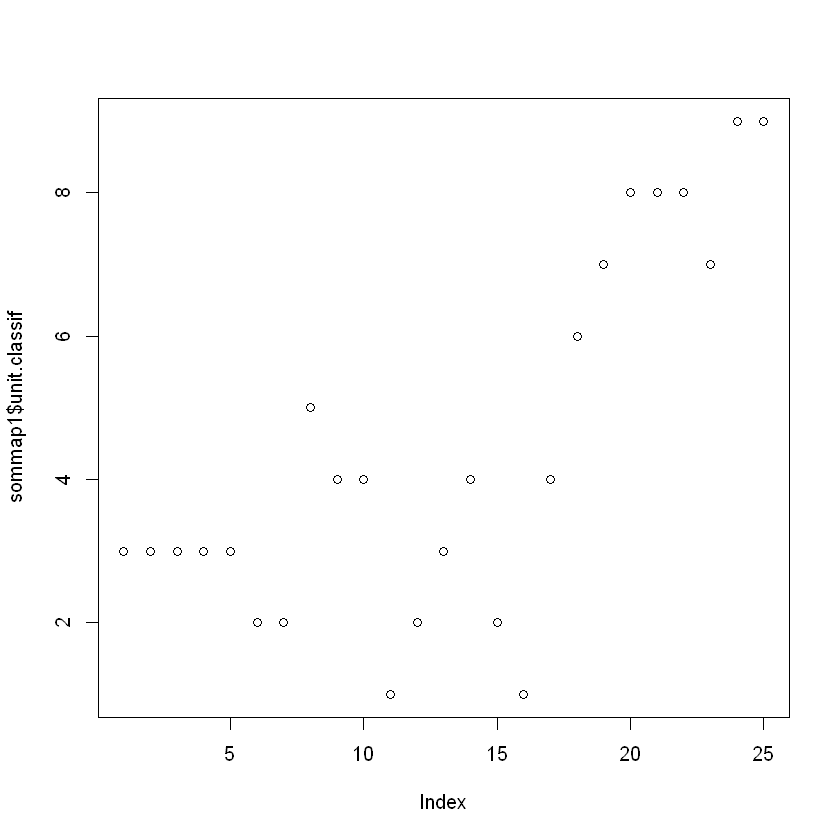

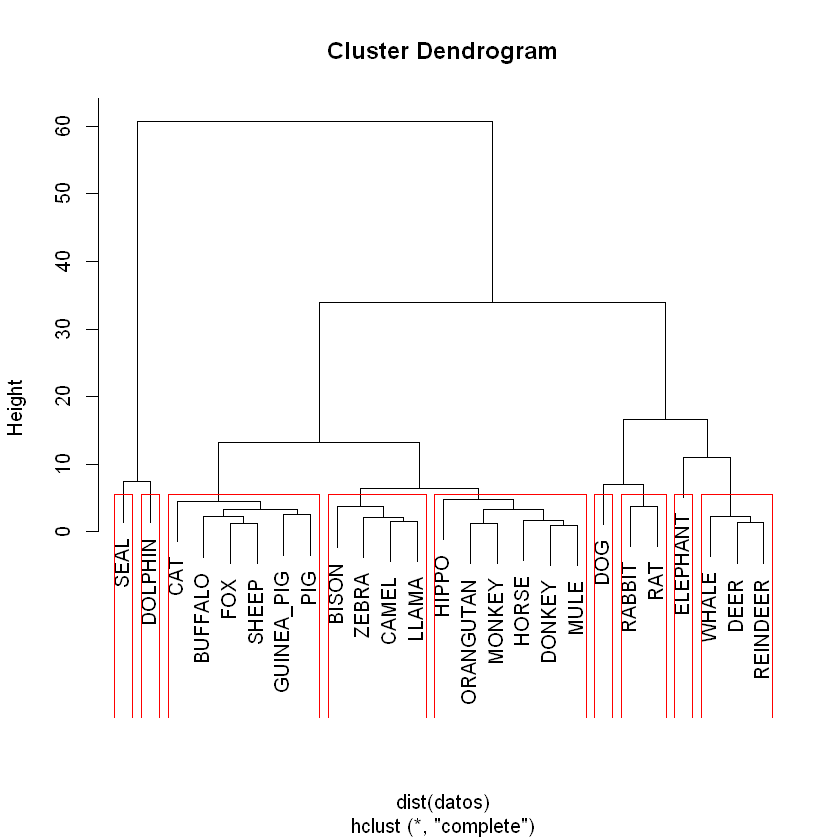

In [9]:
print(datos)
plot(sommap1$unit.classif)
print(sommap1$unit.classif)
plot(res3, ylim = c(0,10))
rect.hclust(res3, k=9, border = "red")

Como podemos ver luego de realizar cerca de 600 iteraciones con un grid de 3x3, se logra una convergencia en las observaciones con un total de 9 nodos o agrupaciones. Si llegamos a cortar el agrupamiento jerarquico del árbol donde se formen 9 grupos, podemos ver que estos grupos tienden a parecerse a las agrupaciones realizadas por los nodos, sin embargo no son iguales. La coincidencia de agrupación más exacta en este punto es la de Hippo, Orangutan, Monkey, Donkey, Horse y Mule, que como podemos ver coincide con las posiciones del 1 al 5 y la 13, que corresponde a estos animales, dentro de un nodo en el método SOM. Creemos que al acotar la cantidad de grupos obtenidos en el agrupamiento jerarquico a 4 por ejemplo, y disminuir la grilla de SOM a una de 2x2 se podrían ver mayor coincidencia en los grupos formados. Como se ve a continuación:

 [1] 4 4 4 4 4 4 4 3 3 3 3 4 4 3 4 3 3 3 2 2 2 2 2 1 1


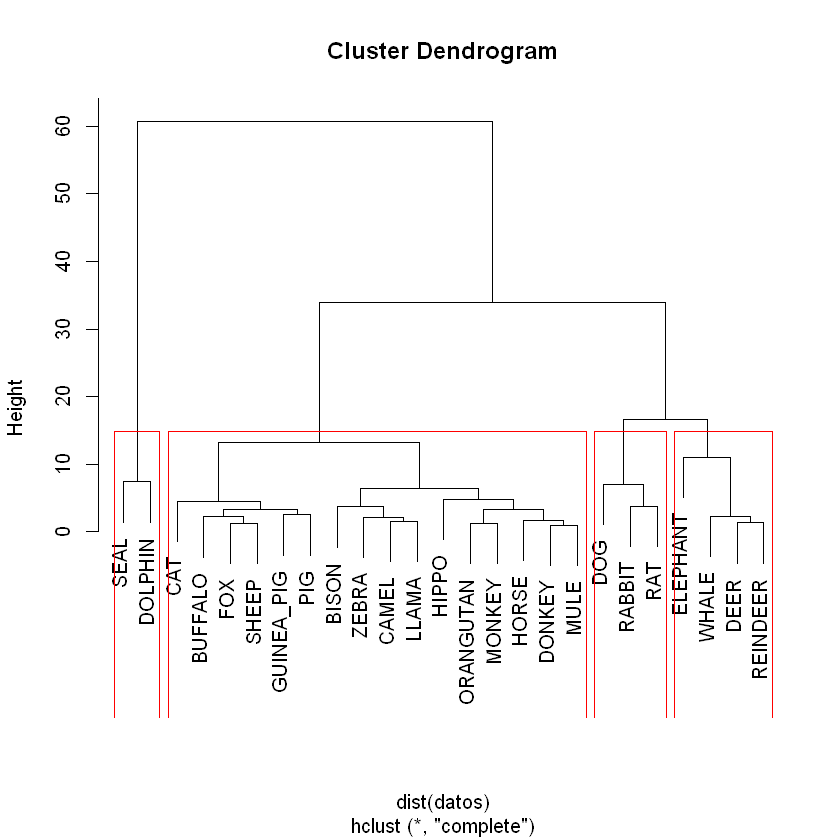

In [10]:
print(sommap$unit.classif)
plot(res3, ylim = c(0,10))
rect.hclust(res3, k=4, border = "red")

Según los resultados obtenidos, se observa una coincidencia considerable en las agrupaciones formadas por ambos métodos. Sin embargo, el agrupamiento jerárquico tiende a generar grupos menos equilibrados en cuanto al número de observaciones por grupo, concentrando más individuos en algunos clústeres que en otros. Esto no representa necesariamente un problema, siempre y cuando las relaciones dentro de los grupos sean coherentes.

En el caso del SOM, al reducir la grilla a 2x2 se generaron cuatro unidades de clasificación, lo que permitió una comparación directa con los cuatro grupos extraídos del dendrograma jerárquico. Si bien existen diferencias entre los grupos formados por ambos métodos, también se identifican similitudes, lo que valida en parte la consistencia de los patrones detectados por ambos enfoques.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

## Respuesta 3.a
Los metodos elegidos para el desarrollo de elejercicio 3 de son:
- K-means
- Metodo SOM


In [11]:
# cargamos los datos de música y obtenemos las etiquetas
library(tidyverse)
dataMusic <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")
labels <- as.factor(dataMusic$genre)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::map()    masks kohonen::map()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [12]:
# Haremos la selección de las variables que nos interesan
data <- dataMusic[, 4:14]

# Normalizamos los datos para que tengan media 0 y varianza 1
features_scaled <- scale(data)


### K-Means
En el primer ejercicios de clustering con k-means se define que el número de clusters optimo era K = 3.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[1] Classical  Electronic Rock      
Levels: Classical Electronic Rock

K-means clustering with 3 clusters of sizes 23, 51, 75

Cluster means:
   popularity acousticness danceability duration_ms     energy instrumentalness
1 -1.37700063    0.8097994   -0.0798454  -0.8136512 -0.6880344       -0.1292409
2  0.02345834    0.8388363   -0.5709498   0.1931591 -0.8278348        0.8595301
3  0.40632853   -0.8187471    0.4127318   0.1181715  0.7739249       -0.5448466
      liveness   loudness speechiness       tempo    valence
1 -0.003234365 -0.4235353   0.1615615  0.18238983  1.0712199
2 -0.366586130 -0.9649833   0.1046876  0.03459285 -0.4061329
3  0.250270440  0.7860728  -0.1207331 -0.07945602 -0.0523371

Clustering vector:
  [1] 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1
 [38] 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2 1 2 2 2 3 2 1 2 2 2 1 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 3
[112] 2 3 3 3 3 3 3 3 1 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3

Within cluster s

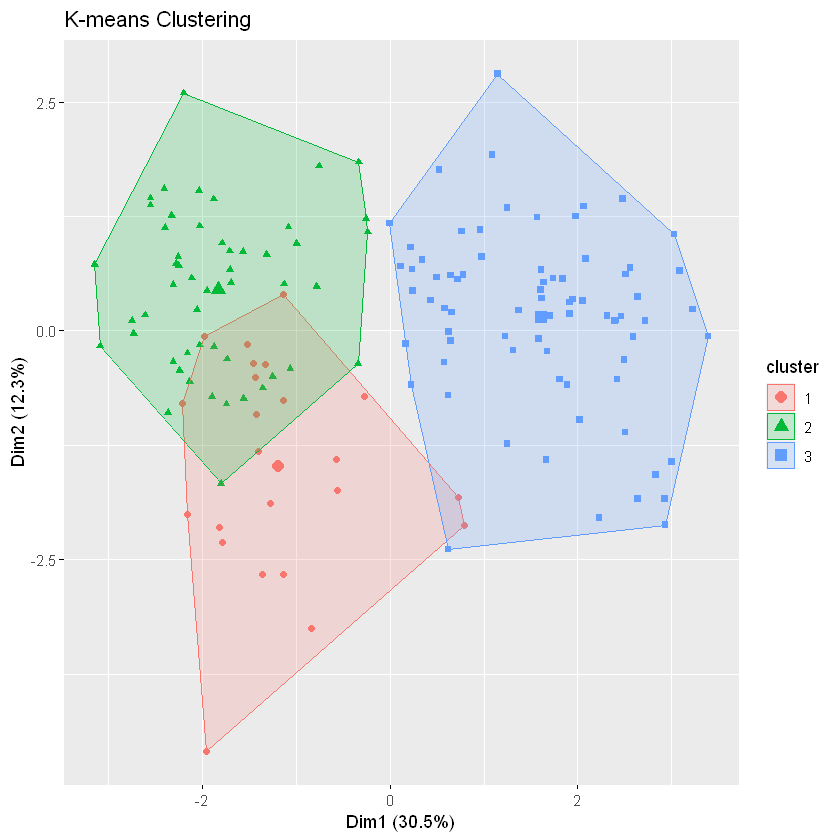

In [13]:
library(factoextra)
set.seed(123)

k <- length(unique(labels))  # Número de géneros 3
genders <- unique(labels)
genders

kmeans_result <- kmeans(features_scaled, centers = k)
kmeans_result

# Visualización de los resultados del clustering
fviz_cluster(kmeans_result, data = data, geom = "point", ellipse.type = "convex", main = "K-means Clustering")


#### Metodo SOM

[[1]]
    popularity acousticness danceability duration_ms     energy
V1  0.02984393   -0.4081750   -0.4695808 -0.09369023  0.5220989
V2 -0.48249821    0.8477331   -0.4479727 -0.04602831 -0.8116198
V3  0.53642338   -0.8362517    0.5338536  0.19365866  0.6622752
   instrumentalness    liveness   loudness speechiness       tempo    valence
V1       -0.7609683  2.79827296  0.5067893   0.0561965  0.09786355 0.18935355
V2        0.6064175 -0.35372815 -0.8339932   0.2724944  0.08821793 0.02008555
V3       -0.5805051 -0.08272204  0.7661411  -0.1519070 -0.19383324 0.11433882



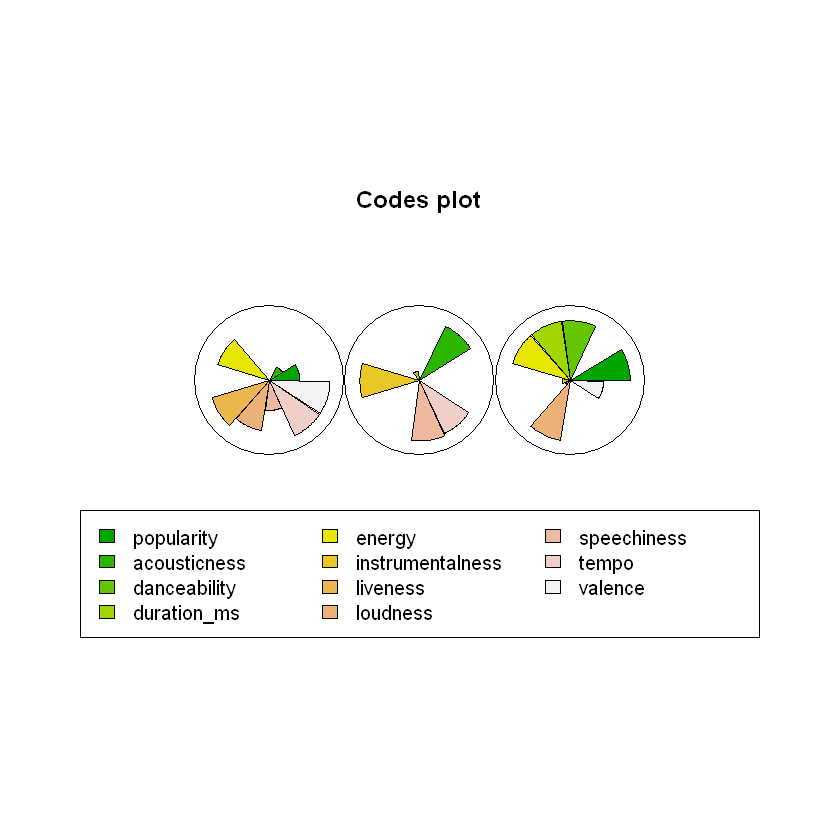

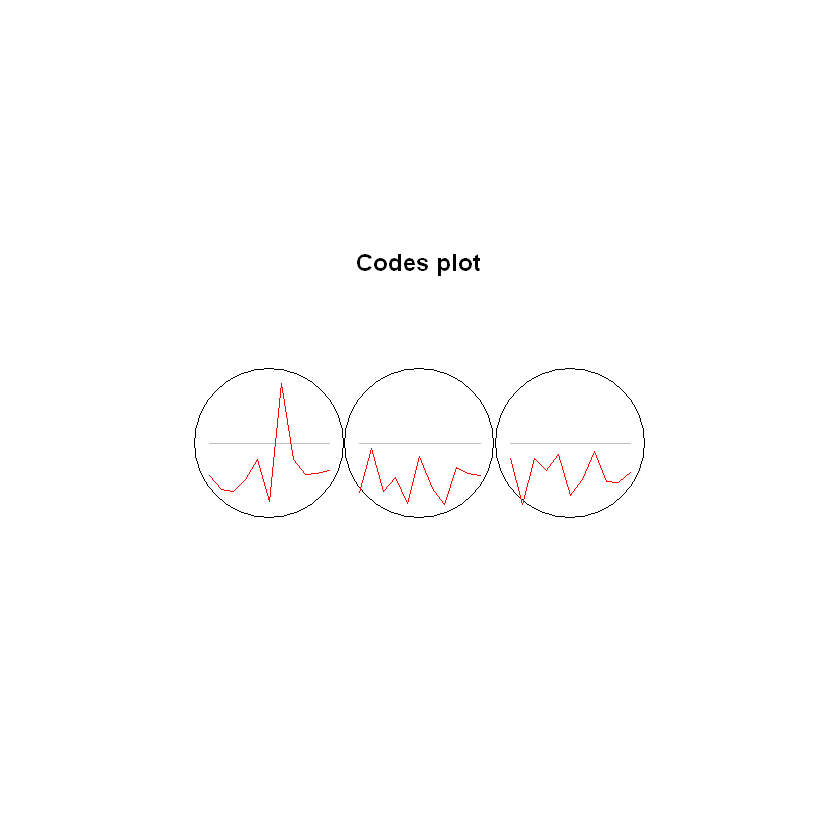

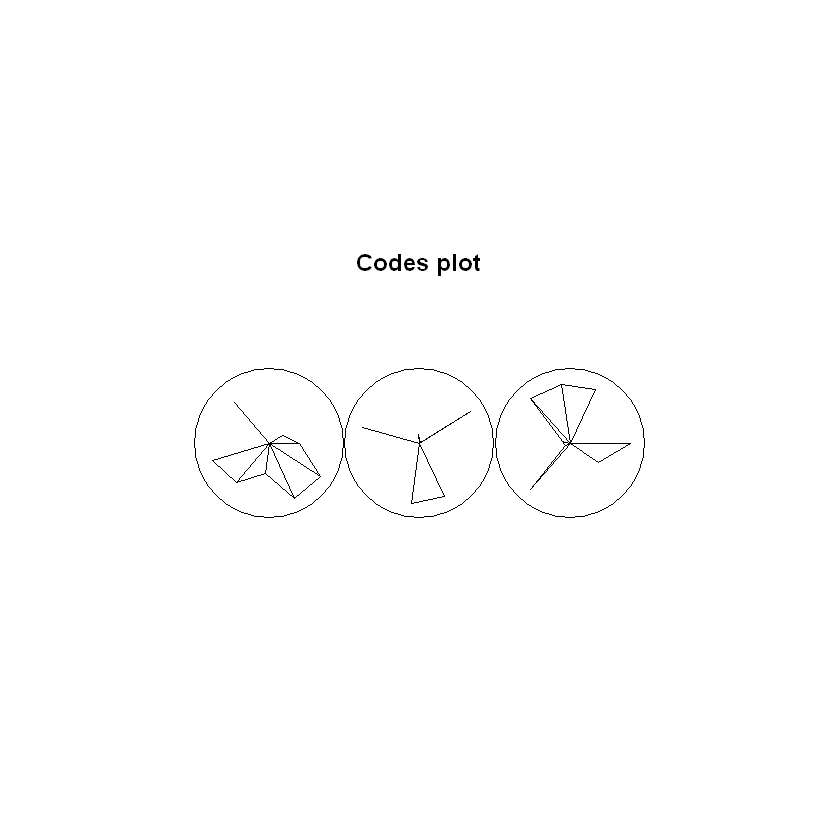

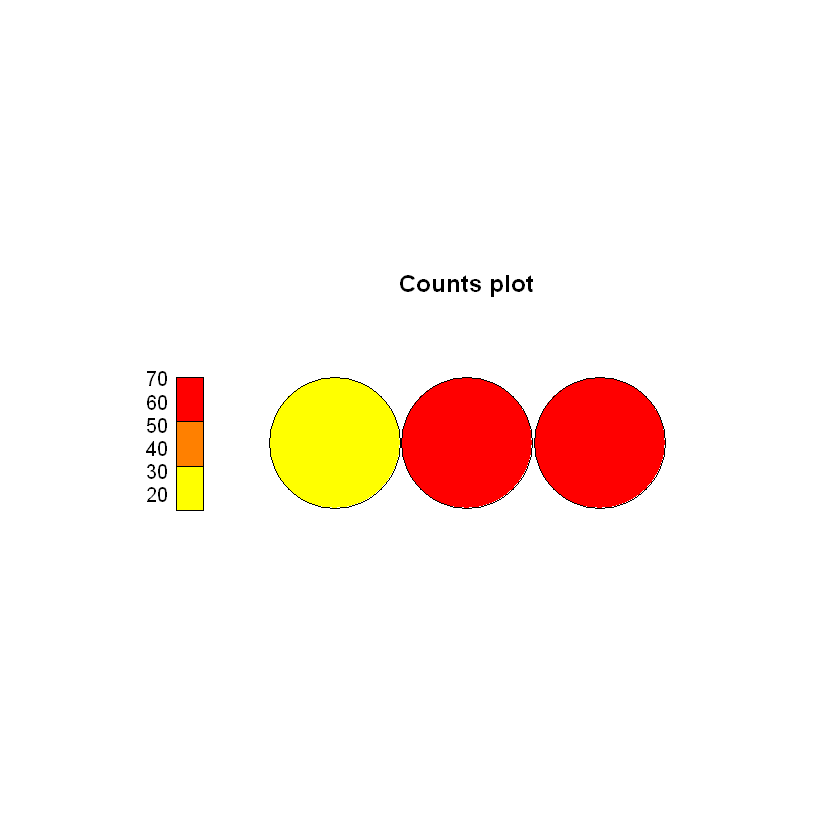

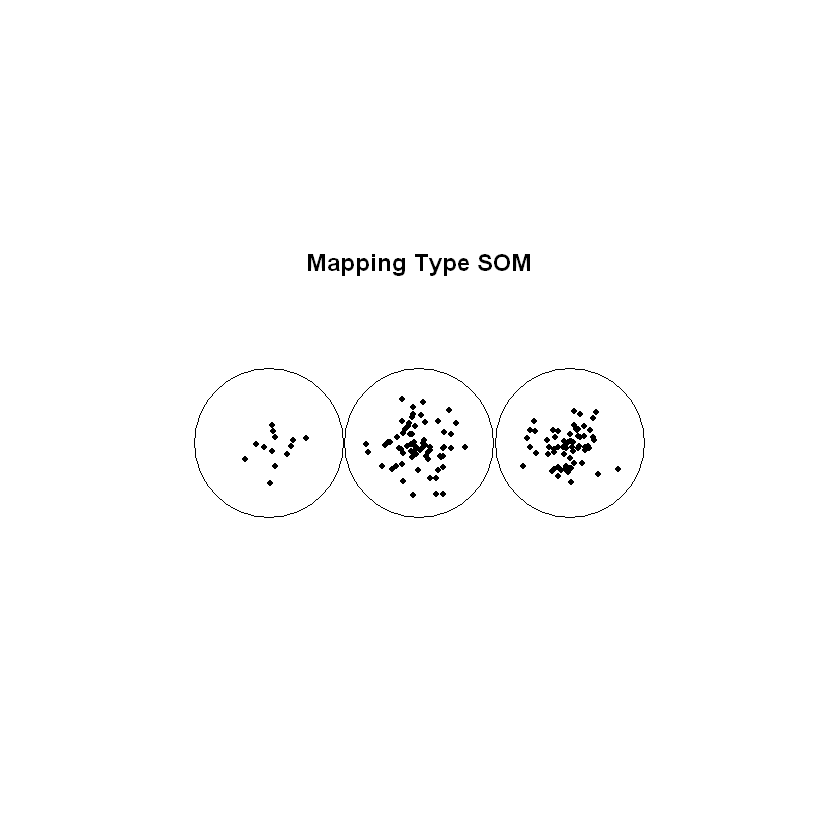

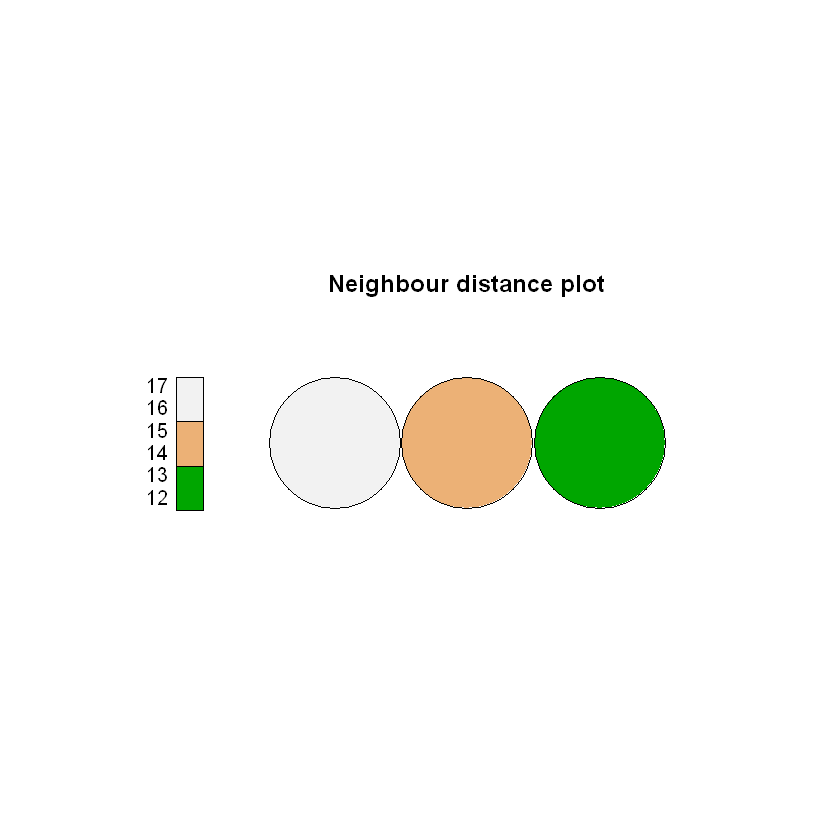

In [17]:
# Normalizar los datos
sommap <- som(features_scaled, rlen=1000, grid = somgrid(3, 1, "hexagonal"))
print(sommap$codes)
plot(sommap, codeRendering="segments")
plot(sommap, codeRendering="lines")
plot(sommap, codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

In [19]:
library(mclust)
# ARI para K-means
ari_kmeans <- adjustedRandIndex(labels, kmeans_result$cluster)

# ARI para SOM
ari_som <- adjustedRandIndex(labels, sommap$unit.classif)

# Mostrar resultados
cat("Adjusted Rand Index (K-means):", ari_kmeans, "\n")
cat("Adjusted Rand Index (SOM):", ari_som, "\n")

Adjusted Rand Index (K-means): 0.4205287 


Adjusted Rand Index (SOM): 0.6417741 


### Respuesta 3.b
- Ambos metodos lograron un agrupamiento de los datos relacionado al genero musical al cual pertenecen (ARI > 0), lo que nos indica que existe un cierto grado de selección por parte de estos algoritmos.
- El ARI del método SOM es más alto que el de k-means, esto nos suguiere que los clusters generados por SOM tienen una mejor correspondencia entre los generos musicales reales y las variables asignadas a cada grupo.
